# GMT 454 HW 1

## Point Pattern Analysis

In this homework, we will explore some of the statistical analysis methods of point patterns. You are given three small datasets of points. For each of the datasets, you are asked to calculate the test statistics. Using the calculated test statistics you are asked to derive a conclusion about the pattern in each dataset.

The pattern can be:

- Data set is Clustered
- Data set follows CSR (Complete Spatial Randomness)
- Data set is evenly distributed

For each test, you are asked to calculate:

1. Quadrat count statistics based on $\chi^2$
2. F, G and L functions
3. Clark-Evans statistical Test on the mean nearest distance

In the conclusion use the statistics you calculated to derive a conclusion for each dataset. Use 95 percent of significance level for your tests. For each dataset give your conclusion about the point pattern observed in the dataset.

Note: The datasets are created for each student independently, Thus conclusion for each dataset may vary from student to student. You should load the dataset using the provided function which takes your id number.

## Due Date

Due date 15/04/2021 not later than midnight.

## Submission
Submit your jupyter notebook to course page at http://evdekal.hacettepe.edu.tr. **Rename your files to include your name and surname.**

## Grading

- Calculate Quadrat Counts: 25 pts
- Calculate F,G, L Functions: 25 pts.
- Calculate Clark-Evans Test statistics: 25 pts.
- Conclusion : 25 pts

100 pts. in total.


## Prerequsites

1. If you did not installed already, please install Anaconda python distribution.
2. This homework requires the following modules

    - pysal
    - geopandas
    - pointpats: you can install pointpats via 'pip install pointpats'

### Initialize the environment

In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20,10)
import numpy as np
import pysal as ps
import geopandas as gpd
import pandas as pd
from pointpats import PointPattern


# Calculate quadrat statistics
import pointpats.quadrat_statistics as qs



from pointpats.window import as_window
from pointpats.distance_statistics import G, F, K, L


## Calculate envelopes G, F, K and L functions under CSR 
from pointpats.distance_statistics import Genv, Fenv, Kenv, Lenv

## Poisson Point Process for creating simulations of Complete Spatial Randomness
from pointpats.process import PoissonPointProcess as csr

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'pysal'

### Load the datasets

Note that some utility functions are already provided for your use


In [2]:

# Load a point pattern dataset with student id and dataset no (ranging from 1 to 3)
def load_ds(id, dsno):
    ds_data = np.load('hw1_datasets/%s/ds%d.npy' % (id,dsno))
    pp = PointPattern(ds_data)
    return pp

## Plot the point patterns pp1, pp2, pp3
## point patterns are loaded by the load_ds function
def plot_point_patterns(pp1, pp2, pp3):
    pp1.plot(window=True, title='Point Pattern 1',get_ax=False)
    pp2.plot(window=True, title='Point Pattern 2',get_ax=False)
    pp3.plot(window=True, title='Point Pattern 3',get_ax=False)

    
## plot the F function envelopes for three point patterns
## f_env_pp1 is the Fenv created from the point pattern pp1
def plot_f_envelopes(fenv_pp1, fenv_pp2, fenv_pp3):
    plt.subplot(1,3,1)
    fenv_pp1.plot()
    plt.title('F PP1')
    plt.subplot(1,3,2)
    fenv_pp2.plot()
    plt.title('F PP2')
    plt.subplot(1,3,3)
    fenv_pp3.plot()
    plt.title('F PP3')

## plot the G function envelopes for three point patterns
## g_env_pp1 is the Genv created from the point pattern pp1

def plot_g_envelopes(genv_pp1, genv_pp2, genv_pp3):
    plt.subplot(1,3,1)
    genv_pp1.plot()
    plt.title('G PP1')
    plt.subplot(1,3,2)
    genv_pp2.plot()
    plt.title('G PP2')
    plt.subplot(1,3,3)
    genv_pp3.plot()
    plt.title('G PP3')

## plot the L function envelopes for three point patterns
## l_env_pp1 is the Lenv created from the point pattern pp1
def plot_l_envelopes(lenv_pp1, lenv_pp2, lenv_pp3):
    
    plt.subplot(1,3,1)
    lenv_pp1.plot()
    plt.title('L PP1')

    
    plt.subplot(1,3,2)
    lenv_pp2.plot()
    plt.title('L PP2')

    
    plt.subplot(1,3,3)
    lenv_pp3.plot()
    plt.title('L PP3')

## Plot the quadrat count statistics for point patterns
## qr_pp1 is the QStatistics created from the point pattern pp1
def plot_qr_statistics(qr_pp1, qr_pp2, qr_pp3):
    qr_pp1.plot()
    qr_pp2.plot()
    qr_pp3.plot()
    
    print ('Quadrat Count Statistics for Point Process 1 : chi2 = %f, p value = %f\n' % (qr_pp1.chi2, qr_pp1.chi2_pvalue))
    print ('Quadrat Count Statistics for Point Process 2 : chi2 = %f, p value = %f\n' % (qr_pp2.chi2, qr_pp2.chi2_pvalue))
    print ('Quadrat Count Statistics for Point Process 3 : chi2 = %f, p value = %f\n' % (qr_pp3.chi2, qr_pp3.chi2_pvalue))

    
    

    
## Load the dataset associated with your student id
## fill in your student id instead of 12345678 below.
pp_1 = load_ds('21632734', 1)
pp_2 = load_ds('21632734', 2)
pp_3 = load_ds('21632734', 3)



### Monte carlo simulation to calculate the lower and upper bound for Complete Spatial Randomness process
### You should use them to calculate the lower and upper bound for F, G, and L functions
realizations = csr(pp_1.window, pp_1.n, 100, asPP=True)



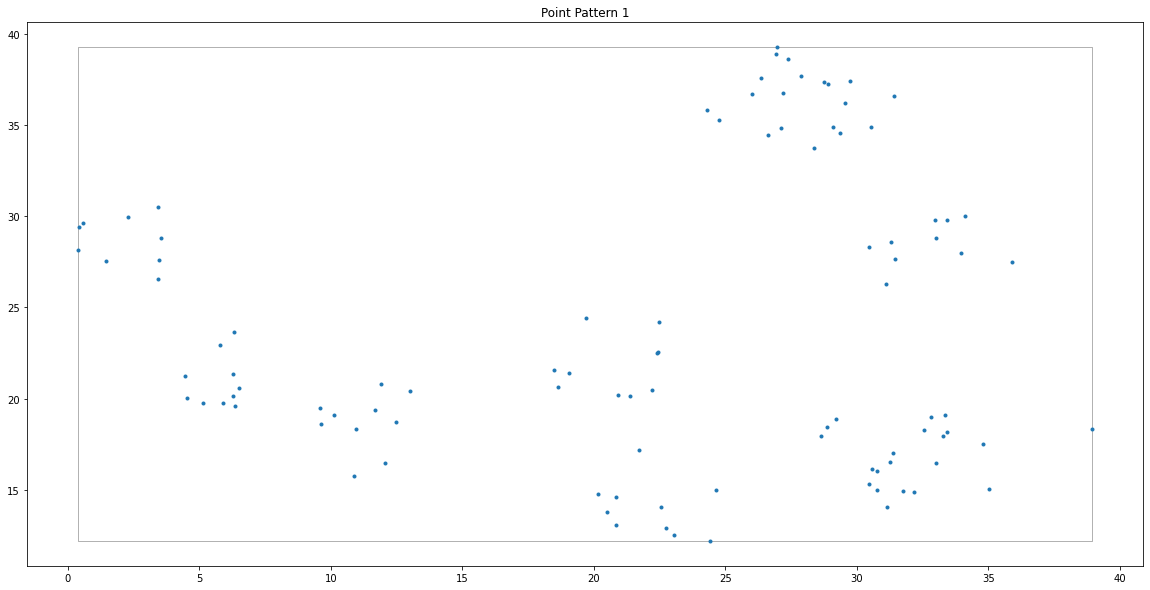

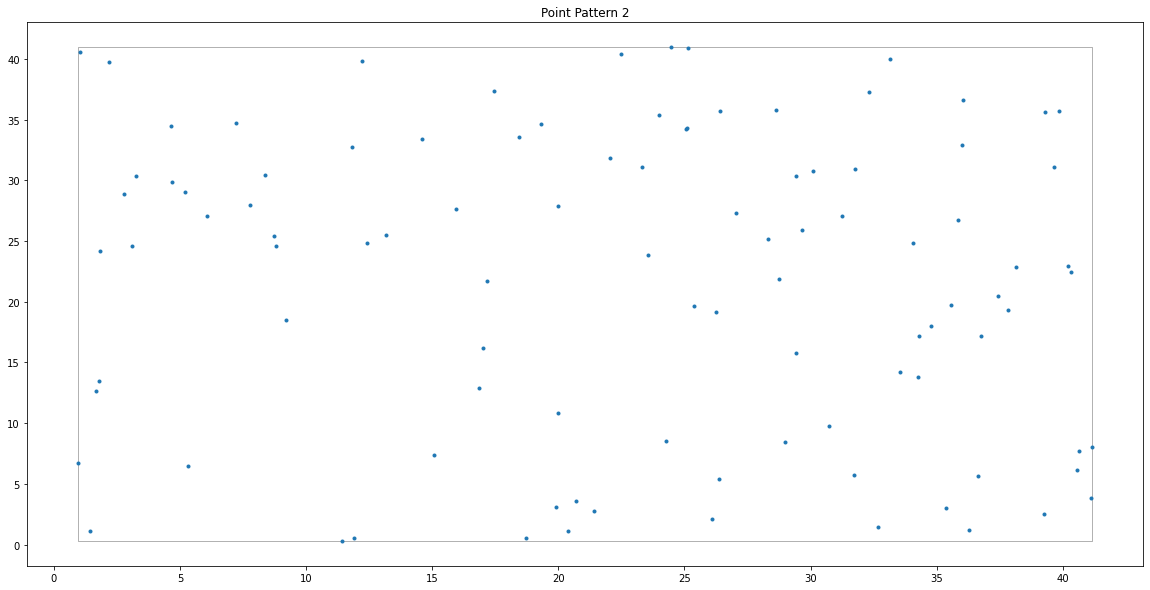

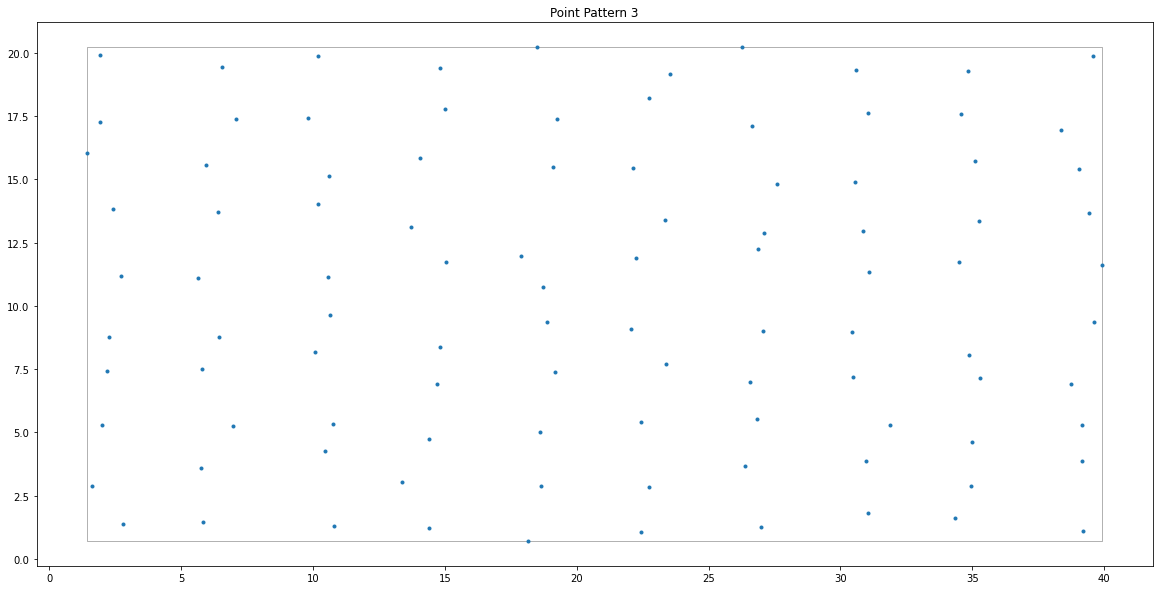

In [3]:
## Plot the loaded patterns

plot_point_patterns(pp_1, pp_2, pp_3)

# Calculate the Quadrat Count Statistics


Use the pointpats QStatistic class to calculate the quadrat count statistic for each point pattern.
Then use the utility function to plot them. A summary for the $\chi^2$ and associated p-value will be printed on screen. You will use the values in the conclusion section.

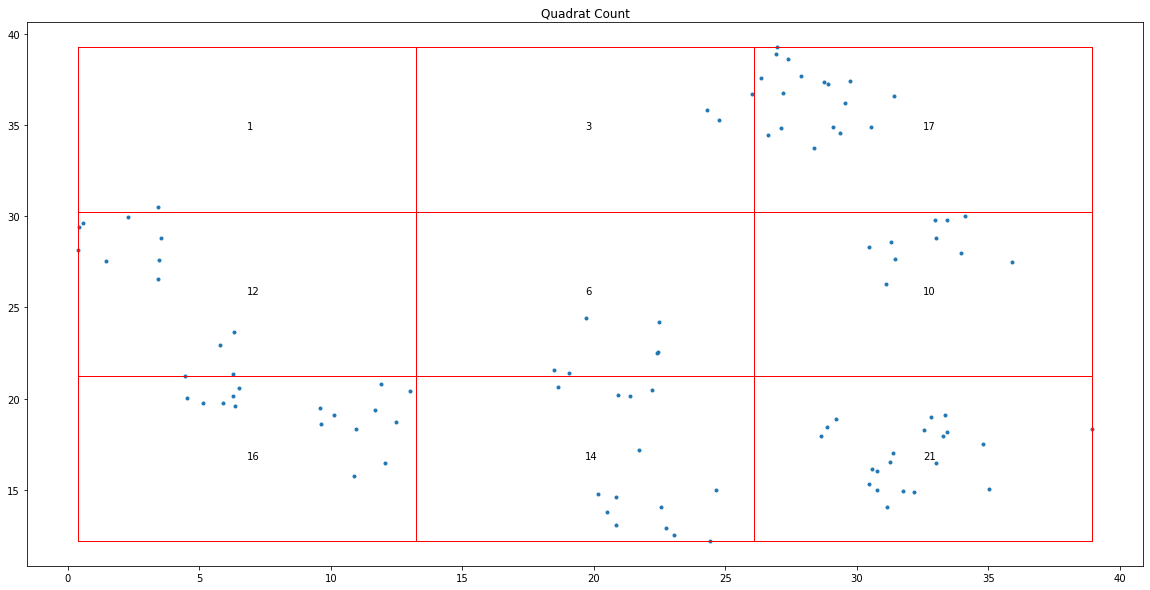

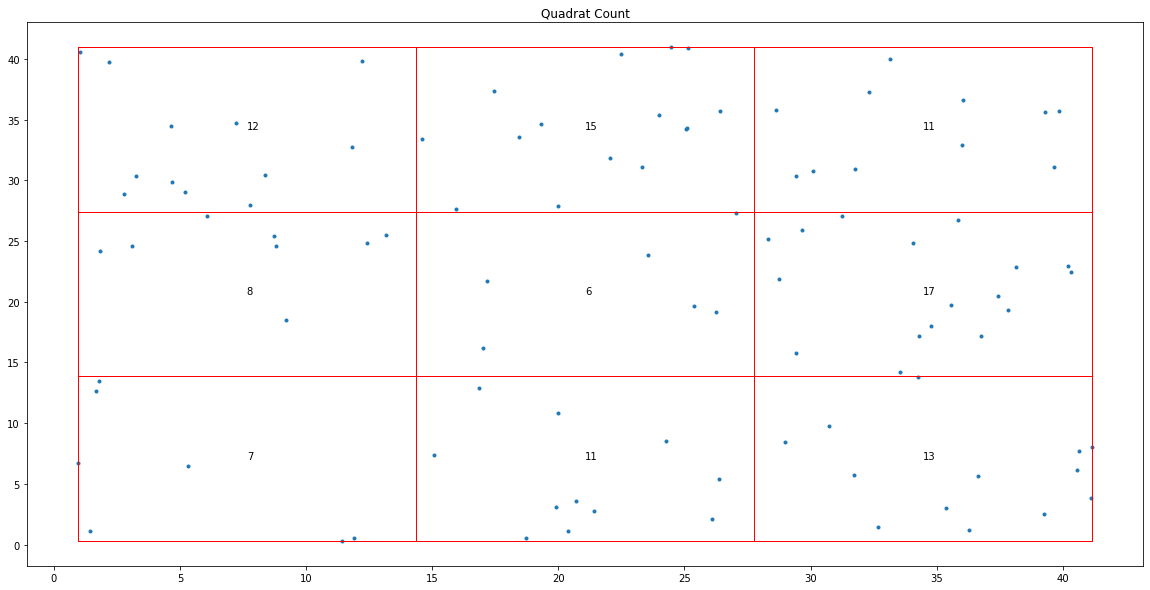

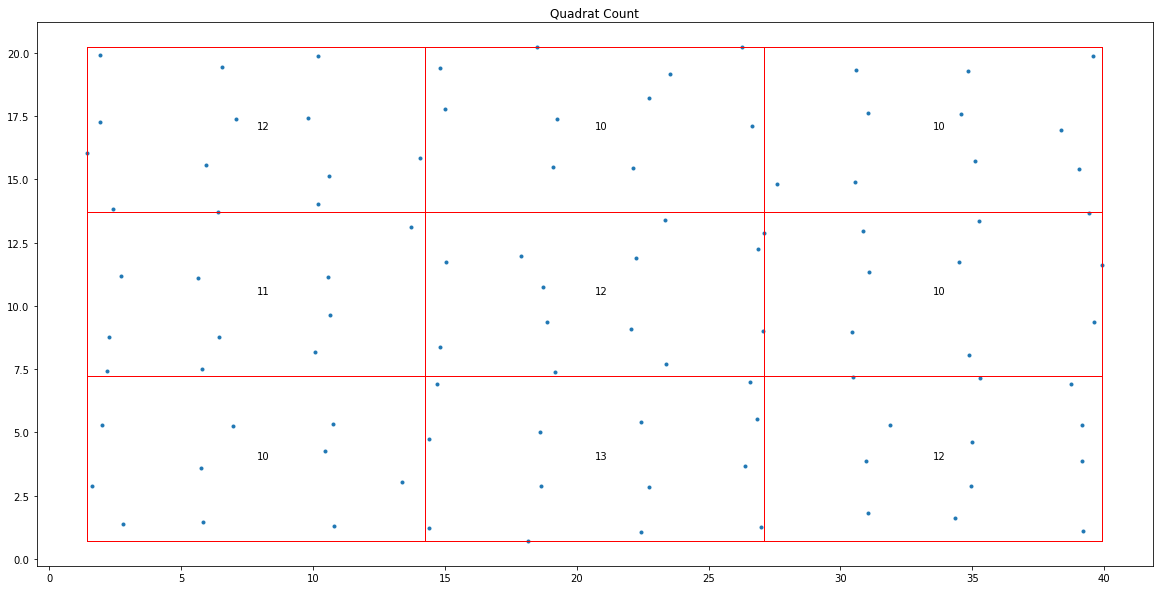

Quadrat Count Statistics for Point Process 1 : chi2 = 32.480000, p value = 0.000076

Quadrat Count Statistics for Point Process 2 : chi2 = 9.620000, p value = 0.292716

Quadrat Count Statistics for Point Process 3 : chi2 = 0.980000, p value = 0.998372



In [9]:
qr_pp1 = qs.QStatistic(pp_1,shape= "rectangle",nx = 3, ny = 3) #3x3'ten büyük seçince içi boş gridler oluşuyordu.
qr_pp2 = qs.QStatistic(pp_2,shape= "rectangle",nx = 3, ny = 3)
qr_pp3 = qs.QStatistic(pp_3,shape= "rectangle",nx = 3, ny = 3)

#3x3 eşit dağılımı görmek için çok yeterli oldu. en altta min 10 max 13, orta 6 17, en üstteki 1 21
# 100er tane eşit sayıda noktalar dağılmış
#aşağıdaki düzgün dağılmış, üstteki kümelenmiş
plot_qr_statistics(qr_pp1, qr_pp2, qr_pp3)
#aşağıda chisquare valuelar hesaplanmış
#p valuelar 0 değil çünkü boş grid yok
#(x2'nin N-1(9-1) degree of freedom)

# Calculate the G, F, L functions

## Calculate the G Function for each data set

Use the Genv class of pointpats library to calculate the G function for each dataset. The utility function will plot the G functions of each dataset and also the bounds for a CSR. You will use the plots in the conclusion section.


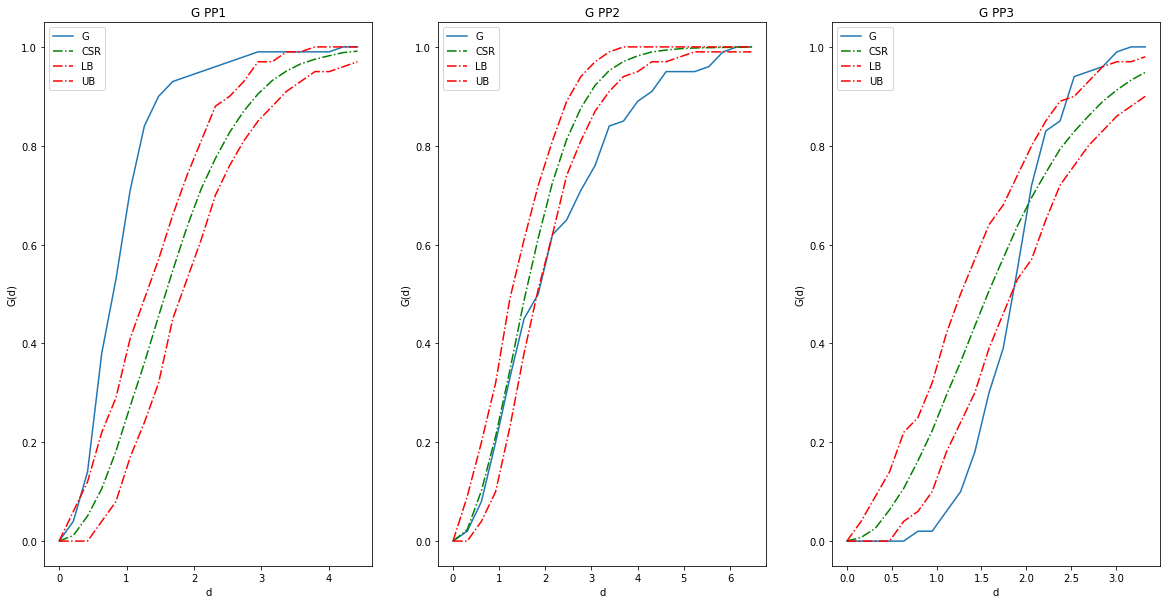

In [16]:
# event to event
#There are no spesific the length of distance domain sequence given so I use interval=20.
genv_pp1 = Genv(pp_1, intervals=20, realizations=realizations) 
genv_pp2 = Genv(pp_2, intervals=20, realizations=realizations) 
genv_pp3 = Genv(pp_3, intervals=20, realizations=realizations)
plot_g_envelopes(genv_pp1, genv_pp2, genv_pp3)


## Calculate the F Function for each data set

Use the Fenv class of pointpats library to calculate the F function for each dataset. The utility function will plot the F functions of each dataset and also the bounds for a CSR. You will use the plots in the conclusion section.



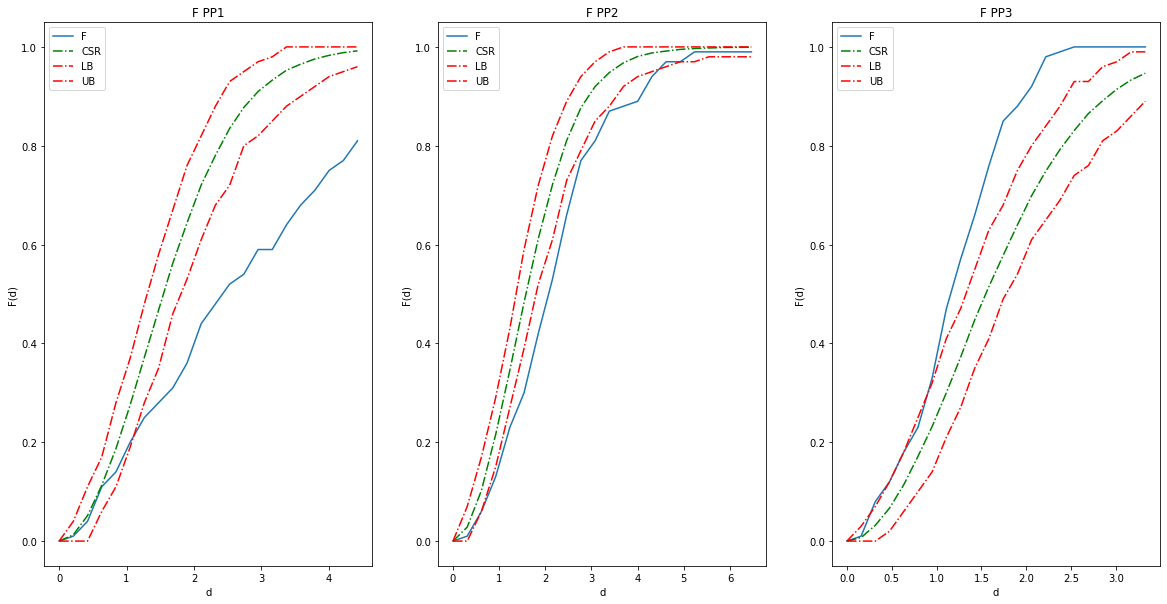

In [19]:
#rasgele noktalar atıp, elimizdeki noktalar ile kıyaslama-analiz yapıyor
#initial olarak 100 nokta.
#point-event
fenv_pp1 = Fenv(pp_1, intervals=20, realizations=realizations) 
fenv_pp2 = Fenv(pp_2, intervals=20, realizations=realizations) 
fenv_pp3 = Fenv(pp_3, intervals=20, realizations=realizations) 
plot_f_envelopes(fenv_pp1, fenv_pp2, fenv_pp3)

#G function shows the closeness of the event, whereas F function displays how far the events are from arbitrary point locations.
#When the number of events in a point pattern is small, G function is rough (see the G function plot for the 12 size point pattern above). One way to get around this is to turn to F funtion where a given number of randomly distributed points are generated in the domain and the nearest event neighbor distance is calculated for each point. The cumulative distribution of all nearest event neighbor distances is called F function.

## Calculate the L Function for each data set

Use the Lenv class of pointpats library to calculate the L function for each dataset. The utility function will plot the L functions of each dataset and also the bounds for a CSR. You will use the plots in the conclusion section.



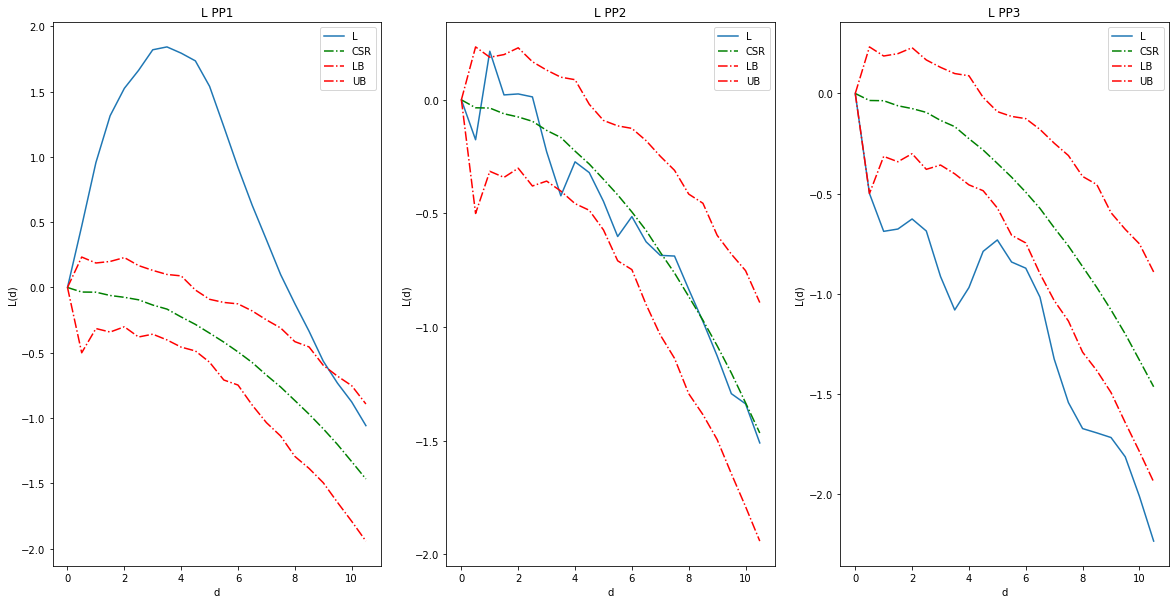

In [13]:
#Interevent
#L function is scaled version of K function
lenv_pp1 = Lenv(pp_1, dmax=10, intervals=20, realizations=realizations) 
lenv_pp2 = Lenv(pp_2, dmax=10, intervals=20, realizations=realizations) 
lenv_pp3 = Lenv(pp_3, dmax=10, intervals=20, realizations=realizations) 
plot_l_envelopes(lenv_pp1, lenv_pp2, lenv_pp3)



# Calculate Clark-Evans test statistics

The mean nearest distance of a point pattern ($\bar{d_{min}}$) is defined as:

$$
\bar{d_{min}} = \frac{1}{N} \sum_{i=1}^{N}d_{min}(s_i)
$$

According to Clark-Evans test about Complete Spatial Randomness, the $\bar{d_{min}}$ is distributed according to normal distribution with: 

$$
\bar{d_{min}} \sim N(\frac{1}{2\sqrt{\lambda}}, \frac{4-\pi}{4\lambda \pi N})
$$

where $\lambda$ is the intensity estimate $\lambda = \frac{N}{Area}$. Using this formulation a z-score can be calculated for each point pattern as:
$$
    z = \frac{\bar{x} - \mu}{\sigma}
$$

Substituting the mean $\bar{x}$ and standard deviation $\sigma$ of the mean nearest distance into the above equation gives

$$
z = \frac{d_{min} - \frac{1}{2\sqrt{\lambda}}}{\sqrt{\frac{4-\pi}{4\lambda \pi N}}}
$$

Use the following python function to calculate the z score for each point pattern dataset. In the conclusion section interpret the z-scores of each point pattern by comparing the associated p-value. 

Hint: 
Use the previous homework for calculating the associated p-value for a given z-score.

In [21]:

## calculate the Clark-Evans z score for a given point pattern pp
def z_score(pp):
    # calculate mean nearest distances
    mean_d_min = pp.mean_nnd
    
    #calculate intensity estimate
    pp_lambda = pp.lambda_window
    
    ## expected standard deviation of CSR
    expected_std_pp = np.sqrt( (4.0 - np.pi) / (4 * pp_lambda * np.pi * pp.n) )
    
    ## expected mean nearest distance of CSR
    expected_mean_pp = 1.0 / (2 * np.sqrt(pp_lambda) )
    
    # The z-score of the point pattern
    z_score = (mean_d_min - expected_mean_pp) / (expected_std_pp)
    
    return z_score
    
print ('Z score of pp 1: %f\n' % (z_score(pp_1)))
print ('Z score of pp 2: %f\n' % (z_score(pp_2)))
print ('Z score of pp 3: %f\n' % (z_score(pp_3)))

Z score of pp 1: -8.495136

Z score of pp 2: 0.910630

Z score of pp 3: 6.492558



# Conclusion

Give a short discussion about the three point pattern dataset by looking at the figures and results. Classify each point dataset (clustered, even, random) by assessing the associated quadrat counts, F, G, L functions and z-scores.

In [ ]:
Installing Libraries:
All installations done by anaconda promt cmd    
I installed the older version of pysal with pip install pysal==1.14.4.post2
I installed the gdal.whl for python 3.8 then installed fiona.whl for python 3.8
After the installation of gdal and fiona I installed geopandas with pip install geopandas.
    
Interpretation of point patterns and Quadrant Counts:
I prefer to use 3x3 grid to separate point patterns because if I chose 4x4 or 5x5 some grids will have 0 points Also 3x3 is
almost perfect to represent well distribution of last pattern. 
The degree of freedom of grids 9-1=8
I observed the first pattern was clustered and the last one was well distributed and all of the patterns have same number of points.
As result; The minimum and maximum number of point differences between paterns in order to 1-21(first pattern), 6-17, 10-13(last pattern).
The p values not zero on all paterns because there are no grid which has zero point.
There is no doubt if p values increase; the chisquare values decrease

Calculations of F,G, L Functions:
realization simulate csr 100 times.    
If the interval increase the F get more smooth.
intervals [int] The length of distance domain sequence.
dmin [float] The minimum of the distance domain.
I used same dmin and intervals values in different patterns for better comparasion.

Calculate Clark-Evans test statistics:
This section calculated by formulas given above here.
To calculate expected mean nearest distance of CSR. I used pp_lambda because it is a theoretical value which is 1/(2*sqrt(lambda))
As result more steady distributed patern means higher Z score.